In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
stocks=pd.read_csv('data/ALL_DATA.csv')

In [4]:
stocks

,symbole,date,ouverture,haut,bas,cloture,volume
0,TGH,2022-12-30,0.600000,0.600000,0.600000,0.600000,146218
1,ADWYA,2022-12-30,5.950000,5.950000,5.950000,5.950000,9422
2,BH,2022-12-30,13.560000,14.000000,13.560000,13.560000,4227
3,SMART,2022-12-30,24.200000,24.200000,23.950000,24.200000,7375
4,PGH,2022-12-30,8.780000,8.780000,8.780000,8.780000,1
...,...,...,...,...,...,...,...
168312,SPDIT,2010-01-04,6.050000,6.200000,6.050000,6.200000,3180
168313,TJL,2010-01-04,23.300000,23.310000,23.300000,23.310000,1143
168314,MNP,2010-01-04,25.235221,25.452766,25.235221,25.289607,2739
168315,ARTES,2010-01-04,8.223726,8.358541,8.223726,8.358541,1851


In [6]:
stocks.shape

(168317, 7)

In [7]:
stocks.isnull().sum()

symbole       0
date          0
ouverture    31
haut         33
bas          23
cloture      33
volume        0
dtype: int64

In [12]:
np.where(stocks['ouverture'].isnull())[0]

array([  2335,   2491,   2971,   3135,   3199,   3454,   3521,   3776,
         4100,   4301,   4388,  11490,  11542,  42100,  57515,  58008,
        78573,  79251,  79376,  79826,  80302,  81053,  81362,  81942,
        81975,  82206,  82289,  98012, 106753, 106822, 107417],
      dtype=int64)

In [13]:
stocks.iloc[2335]

symbole           BHASS
date         2022-11-03
ouverture           NaN
haut                NaN
bas                50.0
cloture             NaN
volume               38
Name: 2335, dtype: object

We could impute the null rows buy hey they are so few, gonna just drop them xD

In [19]:
stocks.dropna(inplace=True)

In [21]:
stocks.describe().T

,count,mean,std,min,25%,50%,75%,max
ouverture,168281.0,15.156818,30.933802,0.12,3.54,7.16,14.40,602.75
haut,168281.0,15.252414,31.059811,0.13,3.58,7.21,14.49,602.75
bas,168281.0,15.058650,30.801951,0.12,3.50,7.10,14.30,602.75
cloture,168281.0,15.174964,30.944945,0.12,3.55,7.18,14.40,602.75
volume,168281.0,14424.344430,79254.737982,0.00,424.00,2311.00,9100.00,8264824.00


### Most traded stock ? 
Having largest volume sum

In [45]:
volume_sum=stocks.groupby('symbole')['volume'].sum().sort_values(ascending=False)

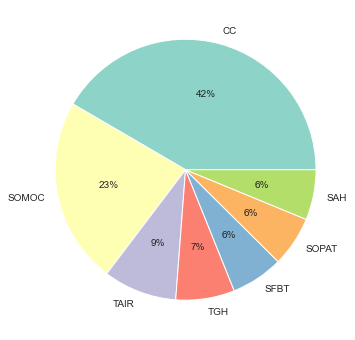

In [61]:
palette_color = sns.color_palette('Set3')
plt.figure(figsize=(8,6))
plt.pie(volume_sum.values[:7],labels=volume_sum.keys()[:7], colors=palette_color, autopct='%.0f%%')
plt.show()